In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from pyclim_noresm.general_util_funcs import global_avg
import matplotlib
import matplotlib as mpl
import numpy as np
from tools import global_map
matplotlib.rcParams.update({'font.size': 14})

In [2]:
model_paths = {
    'CNRM-ESM2-1':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_CNRM-ESM2-1_Ayear.nc',
    'EC-Earth3-AerChem':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_EC-Earth3-AerChem_Ayear.nc',
    'GFDL-ESM4':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_GFDL-ESM4_Ayear.nc',
    'GISS-E2-1-G':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_GISS-E2-1-G_Ayear.nc',
    'IPSL-CM6A-LR-INCA':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_IPSL-CM6A-LR-INCA_Ayear.nc',
    'NorESM2-LM':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_NorESM2-LM_Ayear.nc',
    'MIROC6':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_MIROC6_Ayear.nc',
    'UKESM1-0-LL':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_UKESM1-0-LL_Ayear.nc',
    'MPI-ESM-1-2-HAM':'../results/piClim-2xdust/ERFt/ERFt_piClim-2xdust_MPI-ESM-1-2-HAM_Ayear.nc'
}

sorted(model_paths)

['CNRM-ESM2-1',
 'EC-Earth3-AerChem',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'IPSL-CM6A-LR-INCA',
 'MIROC6',
 'MPI-ESM-1-2-HAM',
 'NorESM2-LM',
 'UKESM1-0-LL']

In [9]:
total_erf = {}
total_erf['std'] = {}
total_erf['mean'] = {}

for key in sorted(model_paths)[::-1]:
    ds = xr.open_dataset(model_paths[key])
    # ds_std = global_avg()
    # std = *global_avg(ds['ERFt'])
    std = global_avg(ds['ERFt'])
    std = std.std(dim='year')
    
    ds = ds.mean(dim='year')
    ds = global_avg(ds['ERFt'])
    total_erf['mean'][key] =  {}
    total_erf['mean'][key] = ds.values
    total_erf['std'][key] = {}
    total_erf['std'][key] = std.values
    # ds = ds['ERFt'].mean(dim=['lon','lat'])
    # ds = ds.assign_coords(year=range(1,len(ds.year)+1))
    # ds = ds.to_dataset(name=f'{key}')
    # dsets.append(ds)

In [10]:
df =  pd.DataFrame(total_erf)

df = df.transpose()

In [74]:
df

,UKESM1-0-LL,NorESM2-LM,MPI-ESM-1-2-HAM,MIROC6,IPSL-CM6A-LR-INCA,GISS-E2-1-G,GFDL-ESM4,EC-Earth3-AerChem,CNRM-ESM2-1
std,0.005024027875279307,0.013663118107119867,0.005560113559210179,0.007570614592384128,0.009366004429064946,0.005052294522239495,0.006252536465396226,0.009437476682905423,0.007795474399401834
mean,0.031285707196255064,-0.14615400383560992,-0.3005430856268192,-0.18470292870914692,-0.23617299327682323,-0.08689154380678663,-0.0035085220708833136,-0.4162506916328745,0.08902127061326309


In [11]:
df.loc['mean','Multi-model'] = df.loc['mean',:].mean()
df.loc['std','Multi-model'] = df.loc['std',:].mean()
# mean_ERF = df.mean()
# erf_std = df.std()



In [12]:
erf_mean = df.transpose()['mean'].astype(float)
erf_std = df.transpose()['std'].astype(float)

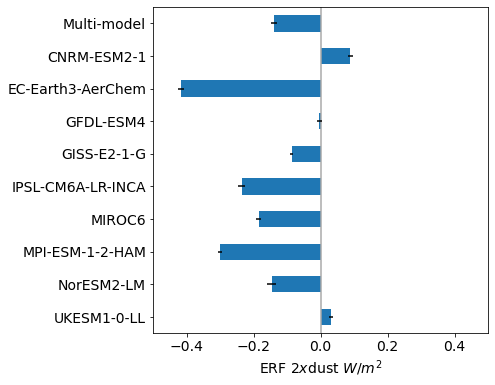

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
ax.axvline(color='darkgrey')
erf_mean.plot.barh(ax=ax,xerr=erf_std)
ax.set_xlim(-0.5,0.5)
ax.set_xlabel('ERF 2$x$dust $W/m^2$')
plt.savefig('../figs/ERF_TOA.png', facecolor='w')

Most models does not show any forcing changes from a doubling of dust. Thus adding 3 more models does not change the previous conclusions.

In [ ]:
mean_ERF

In [14]:
dsets = {}
for key,path in model_paths.items():
    ds = xr.open_dataset(path)
    # ds = global_avg(ds['ERFt'])
    std = ds['ERFt'].std(dim='year').to_dataset(name=f'{key}_std')
    mean = ds['ERFt'].mean(dim='year').to_dataset(name=f'{key}')
    ds = xr.merge([std,mean])
    # ds = ds.to_dataset(name=f'{key}')
    dsets[key] =ds

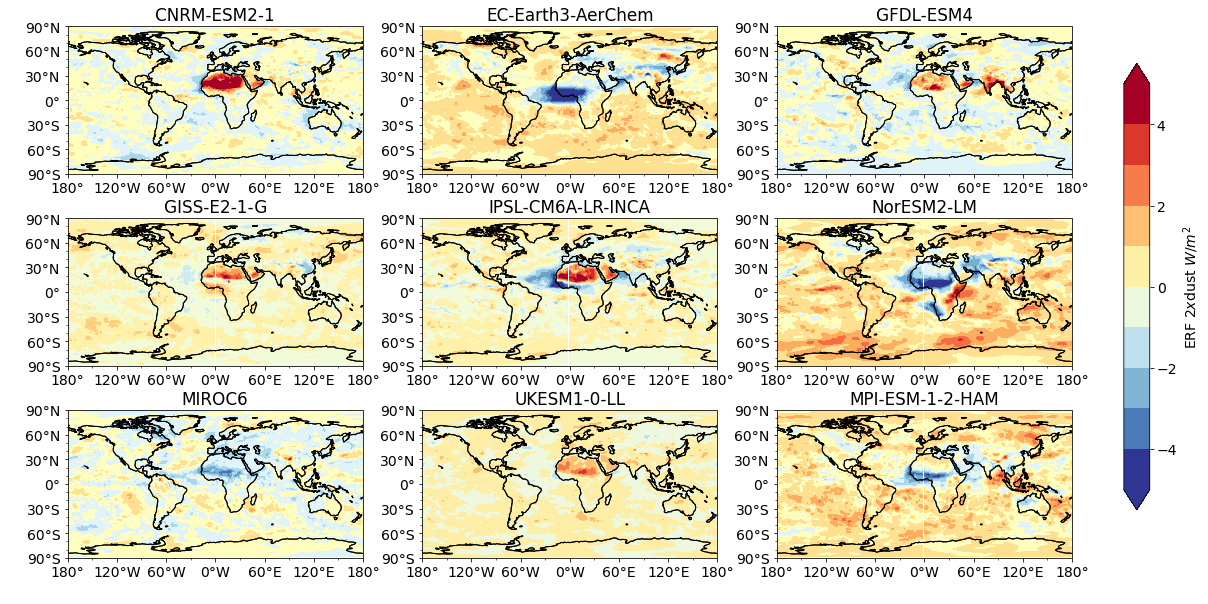

In [15]:
fig, ax = plt.subplots(ncols=3,nrows=3, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(18,10))
for key, ax_i in zip(dsets,ax.ravel()):
    dsets[key][key].plot.contourf(ax=ax_i,levels=np.linspace(-5,5,11),cmap='RdYlBu_r', add_colorbar=False)
    ax_i.coastlines()
    ax_i.set_title(key)
    global_map(ax_i)
cax = fig.add_axes([0.94,0.2,0.02,0.62])
cmap = mpl.cm.RdYlBu_r
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.linspace(-5,5,11),cmap.N),cmap), cax=cax, extend='both', 
             label='ERF 2$x$dust $W/m^2$')
plt.savefig('../figs/ERFt_CMIP6.png', dpi=144, facecolor='white')